# Task 3 - Clustering (34 points)

**Task Description:** A student who has not attended this course yet but who is interested in data mining tried to cluster two datasets. Unfortunately, they did not succeed and asked you for some help. In this task, you will read what the student said about their experience and help them by describing the data and the clustering algorithms. You will also try out the clustering algorithms yourself to make sure that your recommendations are correct.

**Quality Assessment:** To encourage you not to use AI tools and to write the solutions yourself, we will deduct additional points if your solutions are consequently weird (e.g. describe clusters as "precise" or "irregular") or do not answer the question. If you write the solutions yourself, paying attention to the task description, this should not affect you (even if you make some mistakes). However, if you copy answers form AI tools, which often use weird words or return irrelevant solutions, you will most likely get negative points, reducing the total points you get for this assignment.

**Input:** The data folder contains the input files (`dataset1.csv`, `dataset2.csv`). In each dataset the data points have 2 features and 1 class label. Do not forget to exclude the data that should not be considered for clustering when you apply the algorithms on the datasets.

In [1]:
# TODO: uncomment the packages you used, please do not import additional non-native packages
# you may change the imports to the following format: from [package] import [class, method, etc.]

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import sklearn

## 3.1 Dataset 1 (15 points)

Student: "I've read that K-Means is usually the default algorithm to cluster datasets as it needs only the number of clusters to be specified. I could figure out how to run it but the results are really bad, it splits the clusters in a really weird way."

#### a) Plot the dataset and colour the points belonging to the same class with the same colour. (1 point)

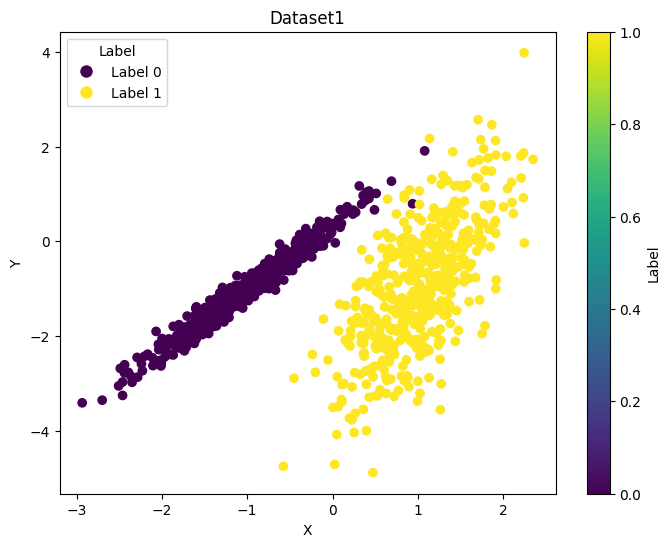

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data1=pd.read_csv('./data/dataset1.csv')

X=data1[['X', 'Y']]
label=data1['label']

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X['X'], X['Y'], c=label, cmap='viridis')  
plt.title('Dataset1')
plt.xlabel('X')
plt.ylabel('Y')

# colorbar of labels for 0 and 1
labels2 = ['Label 0', 'Label 1']
color = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(0)), markersize=10),
         plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(1)), markersize=10)]
plt.legend(color, labels2, title='Label', loc='upper left')
plt.colorbar(label='Label')
plt.show()

#### b) Describe the dataset and the clusters in it in. A person who did not look at the data should be able to imagine how it looks. Write maximum 3 sentences. (2 points)

[write your answer here]

The group on the left (purple) shows a dense, linear pattern with a small variance, where the y-values increase as the x-values increase. On the other hand, the group on the right (yellow) is more spread out and has a larger variance compared to the purple group, exhibiting an elliptical pattern.

#### c) Explain why the algorithm the student chose is not suitable for the dataset. Compare what the algorithm assumes about the data with the properties of the dataset in maximum 3 sentences. (3 points)

[write your answer here]

K-means algorithm typically works well for circular clusters with similar densities that can be linearly separated. However, in Dataset 1, the purple and yellow clusters have different densities and are not linearly separable, making K-means less suitable for this dataset.

#### d) Recommend a more suitable clustering algorithm (NMI score at least 0.95) and explain why it would cluster the dataset better. Compare what the algorithm assumes about the data with the properties of the dataset in maximum 3 sentences. (3 points)

[write your answer here]

The purple cluster(left) shows a linear pattern with low variance, while the yellow cluster(right) has a high variance elliptical pattern. DBSCAN, which clusters based on density, is well-suited for handling such mixed structures.Thus, it is expected to perform better. 

#### e) Cluster the dataset with both algorithms (the algorithm the student chose and the algorithm you chose) and plot the clustering results. (4 points)

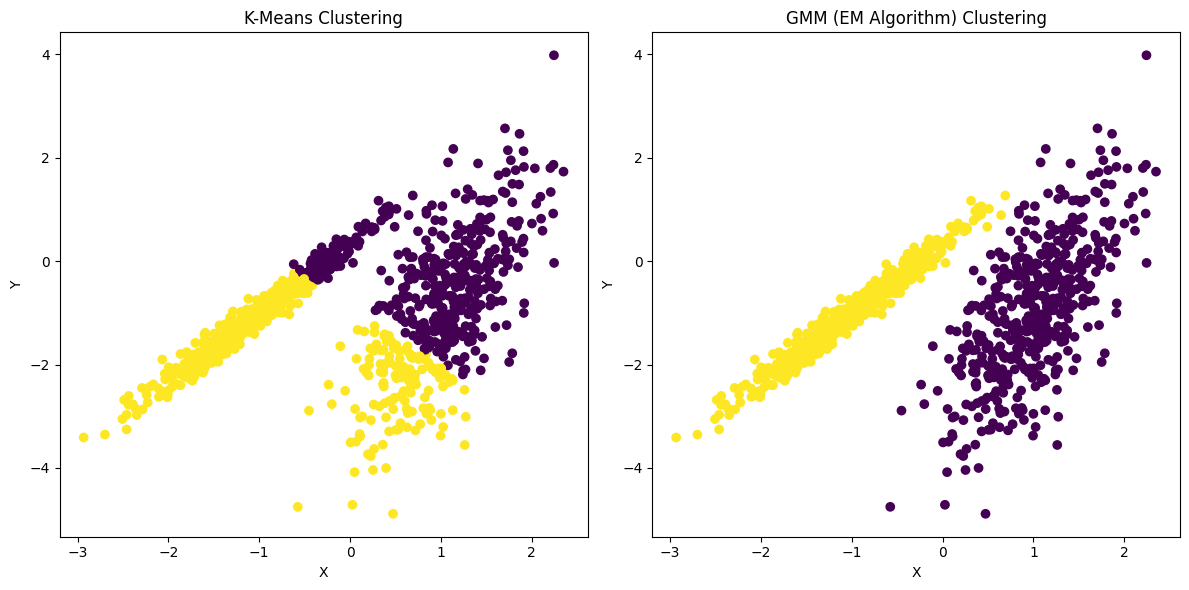

In [2]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

data1=pd.read_csv('./data/dataset1.csv')
X=data1[['X', 'Y']]
label=data1['label']

scaler=StandardScaler()
X_scaled= scaler.fit_transform(X)

# K-Means
kmeans=KMeans(n_clusters=2, random_state=42)
kmeans_labels=kmeans.fit_predict(X_scaled)

# GMM
gmm=GaussianMixture(n_components=2, random_state=42)
gmm_labels=gmm.fit_predict(X_scaled)

plt.figure(figsize=(12, 6))

# K-Means result
plt.subplot(1, 2, 1)
plt.scatter(X['X'], X['Y'], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('X')
plt.ylabel('Y')

# GMM result
plt.subplot(1, 2, 2)
plt.scatter(X['X'], X['Y'], c=gmm_labels, cmap='viridis')
plt.title('GMM (EM Algorithm) Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout()
plt.show()

# reference : https://www.cbrinton.net/ECE20875-2020-Spring/W11/gmms_notebook.pdf (I referenced the code for Gaussian Mixture Models that I found on a Google search.)

#### f) Show that your recommendation is good by comparing the results of the two algorithms using the *Normalized Mutual Information (NMI)* and *(Adjusted) Rand Score* metrics. (2 points)

In [3]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

data1 = pd.read_csv('./data/dataset1.csv')
X = data1[['X', 'Y']]
label = data1['label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# GMM (EM Algorithm)
gmm=GaussianMixture(n_components=3, random_state=42)
gmm_labels=gmm.fit_predict(X_scaled)

# NMI (Normalized Mutual Information)
nmi_kmeans=normalized_mutual_info_score(label, kmeans_labels)
nmi_gmm=normalized_mutual_info_score(label, gmm_labels)

# ARI (Adjusted Rand Index)
ari_kmeans=adjusted_rand_score(label, kmeans_labels)
ari_gmm=adjusted_rand_score(label, gmm_labels)


print(f"K-Means NMI: {nmi_kmeans:.4f}, GMM NMI: {nmi_gmm:.4f}")
print(f"K-Means ARI: {ari_kmeans:.4f}, GMM ARI: {ari_gmm:.4f}")

# reference : https://scikit-learn.org/0.19/modules/generated/sklearn.metrics.normalized_mutual_info_score.html

K-Means NMI: 0.5501, GMM NMI: 0.7720
K-Means ARI: 0.4971, GMM ARI: 0.7392


## 3.2 Dataset 2 (15 points)

Student: "I have no clue what's wrong with K-Means so I tried the AgglomerativeClustering model from sklearn on the other dataset. I used it with average linkage to cluster the data, I guess I should get an average or better result with it?? I set n_clusters to the correct number of clusters but it seems to have put everything into a single cluster..."

#### a) Plot the dataset and colour the points belonging to the same class with the same colour. (1 point)

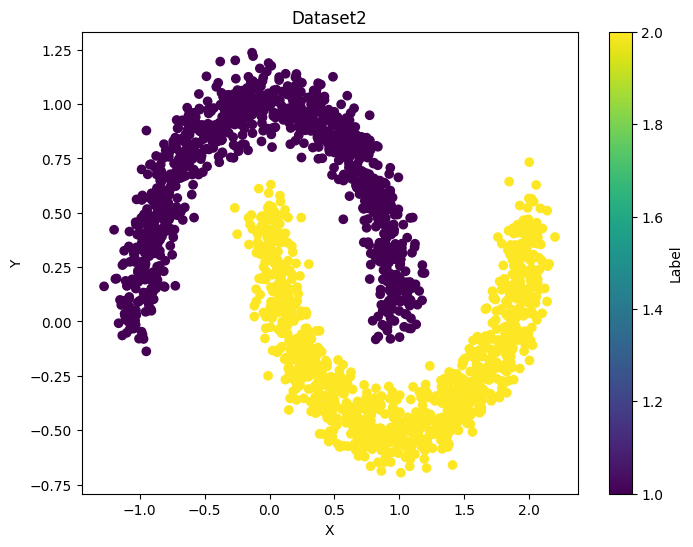

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

data2=pd.read_csv('./data/dataset2.csv')

X=data2[['X', 'Y']]
label=data2['label']

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X['X'], X['Y'], c=label, cmap='viridis')  
plt.title('Dataset2')
plt.xlabel('X')
plt.ylabel('Y')

color = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(0)), markersize=10),
         plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(1)), markersize=10)]
plt.colorbar(label='Label')
plt.show()
plt.show()

#### b) Describe the dataset and the clusters in it in. A person who did not look at the data should be able to imagine how it looks. Write maximum 3 sentences. (2 points)

[write your answer here]

The dataset shows a nonlinear boundary with two clusters. The purple cluster is in the upper-left, forming a convex semicircle, where higher Y and smaller X values are closer to the center. The yellow cluster is in the lower-right, forming a concave semicircle, with lower Y and larger X values near its center.

#### c) Explain why the algorithm the student chose is not suitable for the dataset. Compare what the algorithm assumes about the data with the properties of the dataset in maximum 3 sentences. (3 points)

[write your answer here]

Average linkage creates clusters based on the average distance between points. When points are close, as in Dataset2, it can lead to incorrect clusters. This happens because the average distance becomes too small to separate the clusters properly.

#### d) Recommend a more suitable clustering algorithm (NMI score at least 0.95) and explain why it would cluster the dataset better. Compare what the algorithm assumes about the data with the properties of the dataset in maximum 3 sentences. (3 points)

[write your answer here]

DBSCAN does not impose any assumptions about the shape of clusters and forms clusters based solely on density, making it effective in separating datasets with non-linear spiral structures, such as dataset2

#### e) Cluster the dataset with both algorithms (the algorithm the student chose and the algorithm you chose) and plot the clustering results. (4 points)

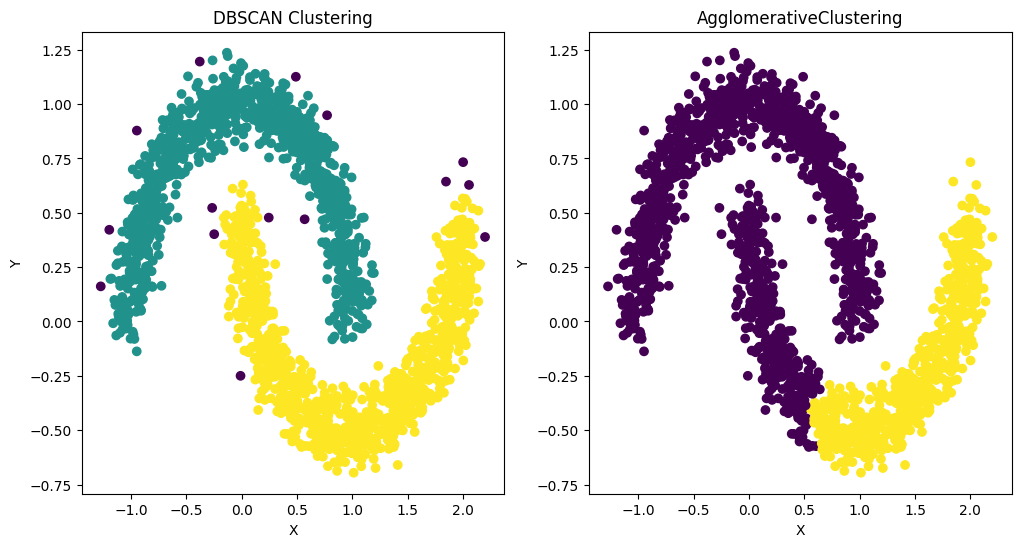

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, AgglomerativeClustering

data2=pd.read_csv('./data/dataset2.csv')

X=data2[['X', 'Y']] 
label=data2['label']  

# DBSCAN
dbscan=DBSCAN(eps=0.1, min_samples=10)
dbscan_labels=dbscan.fit_predict(X)

# AgglomerativeClustering
agg_clustering=AgglomerativeClustering(n_clusters=2)
agg_labels=agg_clustering.fit_predict(X)

plt.figure(figsize=(12, 6))

# DBSCAN result
plt.subplot(1, 2, 1)
plt.scatter(X['X'], X['Y'], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('X')
plt.ylabel('Y')

# AgglomerativeClustering result
plt.subplot(1, 2, 2)
plt.scatter(X['X'], X['Y'], c=agg_labels, cmap='viridis')
plt.title('AgglomerativeClustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# reference of DBSCAN : https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html
# reference of Agglomerative : https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

#### f) Show that your recommendation is good by comparing the results of the two algorithms using the *Normalized Mutual Information (NMI)* and *(Adjusted) Rand Score* metrics. (2 points)

In [6]:
import pandas as pd
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score
from sklearn.cluster import DBSCAN, AgglomerativeClustering

data2=pd.read_csv('./data/dataset2.csv')

X=data2[['X', 'Y']]  
label=data2['label']  

# DBSCAN
dbscan=DBSCAN(eps=0.1, min_samples=10)
dbscan_labels=dbscan.fit_predict(X)

# AgglomerativeClustering
agg_clustering=AgglomerativeClustering(n_clusters=2)
agg_labels=agg_clustering.fit_predict(X)

# NMI (Normalized Mutual Information)
nmi_dbscan=normalized_mutual_info_score(label, dbscan_labels)
nmi_agg=normalized_mutual_info_score(label, agg_labels)

# Adjusted Rand Score
ars_dbscan=adjusted_rand_score(label, dbscan_labels)
ars_agg=adjusted_rand_score(label, agg_labels)


print(f"DBSCAN NMI: {nmi_dbscan:.4f}")
print(f"AgglomerativeClustering NMI: {nmi_agg:.4f}")
print(f"DBSCAN Adjusted Rand Score: {ars_dbscan:.4f}")
print(f"AgglomerativeClustering Adjusted Rand Score: {ars_agg:.4f}")

DBSCAN NMI: 0.9654
AgglomerativeClustering NMI: 0.4495
DBSCAN Adjusted Rand Score: 0.9850
AgglomerativeClustering Adjusted Rand Score: 0.4017


## 3.3 Literature (4 points)

Recommend the student 2 sources that could help them to learn more about clustering. The sources you recommend can be in any format (book, article, blog, video, interactive tutorial, etc.) but it should have a good quality. The topic should be clustering in general or the clustering algorithms you used. State the full urls of the websites (or cite the books properly) and write 3 examples what the student could learn from each.


[write your answer here]

**DBSCAN** (video)  
[https://www.youtube.com/watch?v=O_EigN9iF6E](https://www.youtube.com/watch?v=O_EigN9iF6E)

- DBSCAN properties
- Definitions: density-reachable, density-connected, directly density-reachable
- Algorithm and examples  
(This video lecture is from the Industrial Engineering Department at Seoul National University, South Korea, and it is taught in Korean.)

---

**Hierarchical Clustering** (Article)  
[https://www.learndatasci.com/glossary/hierarchical-clustering/](https://www.learndatasci.com/glossary/hierarchical-clustering/)

- Similarity between clusters (complete, average, single, centroid linkage)
- Hierarchical Clustering types: Agglomerative, Divisive
- Hierarchical clustering steps
merative method